In [54]:
print("Iniciando el script de analisis candidatos neutrones...")
print("Importando librerias necesarias...")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import functions_spills
from scipy.optimize import curve_fit
from collections import defaultdict
import matplotlib.ticker as ticker
import glob
import os
import pickle

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

Iniciando el script de analisis candidatos neutrones...
Importando librerias necesarias...


In [36]:
N_events = 157955
N_events_sig = 79586

In [ ]:
print("Cargando datos de bkg...")
root_dir_bkg = "/data/cgarcia_2002/WCTE/data/2384_calib_time/"
root_files_bkg = sorted(glob.glob(os.path.join(root_dir_bkg, "*.root")))
root_files_bkg = sorted(root_files_bkg, key=lambda file_path: int(file_path.split("P")[-1].split(".")[0]))

print(f"Found {len(root_files_bkg)} background ROOT files.")

times_branch_sorted, times_branch_sorted_TOF, charge_branch_sorted, mpmt_id_branch_sorted, event_number_branch, _ = functions_spills.multiple_partition(root_files_bkg)

print("Datos de background cargados.")
N_events = max(event_number_branch) + 1

#Signal data download #############################################################################################

print("Cargando datos de signal...")
root_dir_sig = "/data/cgarcia_2002/WCTE/data/2385_calib_time/"
root_files_sig = sorted(glob.glob(os.path.join(root_dir_sig, "*.root")))
root_files_sig = sorted(root_files_sig, key=lambda file_path: int(file_path.split("P")[-1].split(".")[0]))

print(f"Found {len(root_files_sig)} signal ROOT files.")

times_branch_sorted_sig, times_branch_sorted_TOF_sig, charge_branch_sorted_sig, mpmt_id_branch_sorted_sig, event_number_branch_sig, _ = functions_spills.multiple_partition(root_files_sig)

print("Datos de signal cargados.")
N_events_sig = max(event_number_branch_sig) + 1

with open('/scratch/cgarcia_2002/Complete_analysis/Filtered_data/OtherTests/deleted_indices_nHits_BKG.pkl', 'rb') as f:
    deleted_indices_nHits = pickle.load(f)

with open('/scratch/cgarcia_2002/Complete_analysis/Filtered_data/OtherTests/deleted_indices_nHits_SIG.pkl', 'rb') as f:
    deleted_indices_nHits_sig = pickle.load(f)

times_branch_filtered = functions_spills.delete_indices_list(times_branch_sorted_TOF, deleted_indices_nHits)
times_branch_filtered_sig = functions_spills.delete_indices_list(times_branch_sorted_TOF_sig, deleted_indices_nHits_sig)

Cargando datos de bkg...
Found 31 background ROOT files.
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P1.root
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P2.root
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P3.root
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P4.root
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P5.root
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P6.root
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P7.root
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P8.root
Procesando archivo: /data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P9.root
Procesando ar

In [42]:
# Leer el CSV
df = pd.read_csv('/scratch/cgarcia_2002/Complete_analysis/Neutron_candidates/neutron_candidates_100-300_22-30.csv')

# Asegurar tipos consistentes (por si event_number o start_time eran strings o enteros)
df['event_number'] = df['event_number'].astype(int)
df['start_time'] = df['start_time'].astype(float)

# Reconstruir el diccionario anidado
neutron_dict = defaultdict(lambda: defaultdict(list))

for _, row in df.iterrows():
    event_number = row['event_number']
    start_time = row['start_time']
    neutron_time = row['neutron_time']
    neutron_dict[event_number][start_time].append(neutron_time)

# Para neutron_dict
neutron_dict = {k: dict(v) for k, v in neutron_dict.items()}

In [43]:
df_sig = pd.read_csv('/scratch/cgarcia_2002/Complete_analysis/Neutron_candidates/neutron_candidates_sig_100-300_22-30.csv')

df_sig['event_number'] = df_sig['event_number'].astype(int)
df_sig['start_time'] = df_sig['start_time'].astype(float)

neutron_dict_sig = defaultdict(lambda: defaultdict(list))

for _, row in df_sig.iterrows():
    event_number = row['event_number']
    start_time = row['start_time']
    neutron_time = row['neutron_time']
    neutron_dict_sig[event_number][start_time].append(neutron_time)

# Para neutron_dict_sig
neutron_dict_sig = {k: dict(v) for k, v in neutron_dict_sig.items()}


In [44]:
print(neutron_dict)
print(neutron_dict_sig)

{19.0: {188000.18873581145: [253859.00957375602]}, 43.0: {76954.33259521834: [108318.21553660056]}, 87.0: {171776.51815174328: [193197.9874461117]}, 143.0: {112977.88949507714: [118006.5924587286, 181770.50466303824]}, 151.0: {20133.394456788297: [20633.46637025206, 31065.557899485742]}, 180.0: {77930.23280743985: [120554.93775702704]}, 200.0: {22905.77600543527: [111153.36219921004]}, 209.0: {100898.65174190604: [111204.1394959632]}, 228.0: {175021.75075142522: [247793.78639914075]}, 326.0: {128529.3776580218: [133873.97047464596]}, 342.0: {108248.85822222695: [108754.11741324117]}, 377.0: {63853.280185845026: [147824.73167384893, 148138.4171696419]}, 452.0: {60412.43269444288: [68421.53636560503]}, 528.0: {161462.78242118596: [161965.7299243387, 162195.33682566823]}, 541.0: {48880.808416325184: [151762.5794760872]}, 571.0: {220019.38994093452: [226664.29934067806]}, 707.0: {86255.49063093367: [86881.39125841802]}, 739.0: {180898.9977517866: [189623.1603871588]}, 766.0: {131402.428484

In [45]:
deltaT = []
for event_number in neutron_dict:
    for start_time in neutron_dict[event_number]:
        neutron_times = neutron_dict[event_number][start_time]
        deltaT.append(min(neutron_times) - start_time)

deltaT_sig = []
for event_number in neutron_dict_sig:
    for start_time in neutron_dict_sig[event_number]:
        neutron_times = neutron_dict_sig[event_number][start_time]
        deltaT_sig.append(min(neutron_times) - start_time)



In [46]:
print(deltaT)

[65858.82083794457, 31363.882941382224, 21421.469294368435, 5028.7029636514635, 500.07191346376203, 42624.70494958719, 88247.58619377477, 10305.487754057162, 72772.03564771553, 5344.592816624165, 505.25919101422187, 83971.4514880039, 8009.103671162149, 502.94750315273996, 102881.77105976202, 6644.909399743541, 625.9006274843559, 8724.162635372195, 70426.25370253006, 19721.597616877916, 75281.00604790128, 505.14203550710226, 3602.2374891298023, 69640.4219538789, 8055.114565661643, 39138.18072739724, 9714.42843432851, 64318.20897632152, 500.5359723645379, 89037.35808584996, 99633.604250278, 2151.9069968668045, 147809.3165146607, 68062.36571621615, 70894.39197970192, 117528.78441186651, 125705.38534358487, 2393.389204998297, 4063.222167968779, 81643.3798971637, 2278.945279763255, 69562.62388106174, 49308.023394251766, 3227.7246460881433, 74653.54292784783, 23023.627912901255, 124088.55780601344, 25918.05576217982, 2156.297303381929, 659.1647863988128, 977.1468623281398, 6923.501635290711,

In [47]:
spills_bkg= 62209
spills_sig = 29764

error_bkg = np.sqrt(spills_bkg)
error_sig = np.sqrt(spills_sig)

ratio_bkg = spills_bkg / N_events
ratio_sig = spills_sig / N_events_sig

error_ratio_bkg = error_bkg / N_events
error_ratio_sig = error_sig / N_events_sig

print("Spills background:", spills_bkg)
print("Spills signal:", spills_sig)
print("Error spills bkg", error_bkg)
print("error spills sig", error_sig)
print("Ratio background:", ratio_bkg)
print("Ratio signal:", ratio_sig)
print("Error background:", error_ratio_bkg)
print("Error signal:", error_ratio_sig)

total_s = N_events * 270 / 10**6
total_s_sig = N_events_sig * 270 / 10**6

print("segundos totales", total_s, total_s_sig)
print("actvidad bkg", spills_bkg / total_s, error_bkg / total_s)
print("actvidad data", spills_sig / total_s_sig, error_sig / total_s_sig)

Spills background: 62209
Spills signal: 29764
Error spills bkg 249.4173209702967
error spills sig 172.52246230563716
Ratio background: 0.3938400177265677
Ratio signal: 0.3739853743120649
Error background: 0.0015790403657389553
Error signal: 0.0021677488792706903
segundos totales 42.64785 21.48822
actvidad bkg 1458.6667323206211 5.84829765088502
actvidad data 1385.131015970611 8.028699552854409


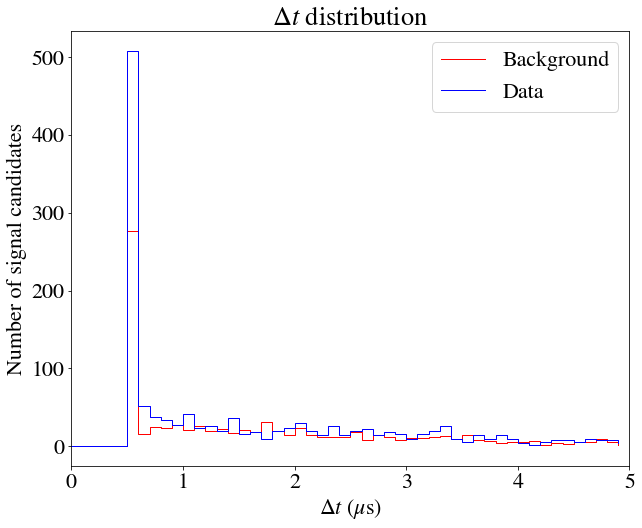

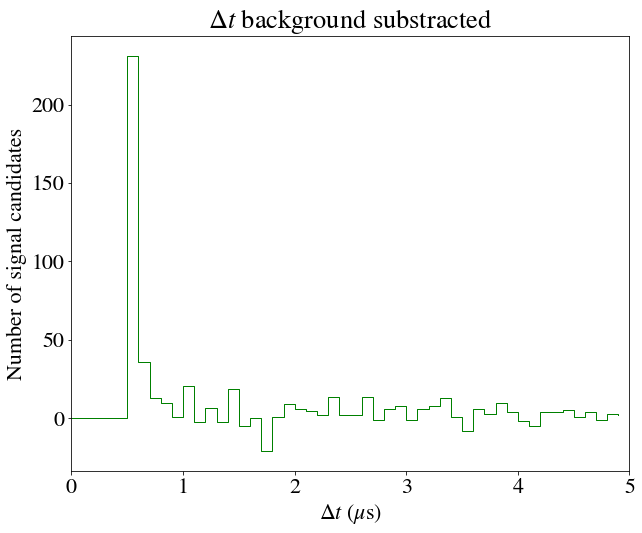

In [52]:
hist, bins_edges = np.histogram(deltaT, bins=int(5000/ 100), range=(0, 5000))
hist_sig, _ = np.histogram(deltaT_sig, bins=bins_edges)

in_value = 10000
hist_filtered, bins_edges_filtered = np.histogram(deltaT, range=(in_value, 150000), bins=int((150000- in_value)/ 1000))
hist_sig_filtered, _ = np.histogram(deltaT_sig, bins=bins_edges_filtered)

plt.figure()
plt.step(bins_edges[:-1], hist, where='post', linewidth=1, label='Background', color='red')
plt.step(bins_edges[:-1], hist_sig*N_events/N_events_sig, where='post', linewidth=1, label='Data', color='blue')
plt.xlabel(r'$\Delta t$ ($\mu$s)')
plt.ylabel('Number of signal candidates')
plt.title(r'$\Delta t$ distribution')
plt.legend()
plt.xlim(0, 5000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
plt.savefig('/scratch/cgarcia_2002/Complete_analysis/Plots/DeltaT/DeltaT_Data.png', facecolor='white')

plt.figure()
plt.step(bins_edges[:-1], hist_sig*N_events/N_events_sig - hist, where='post', linewidth=1, color='green')
plt.xlabel(r'$\Delta t$ ($\mu$s)')
plt.ylabel('Number of signal candidates')
plt.title(r'$\Delta t$ background substracted')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
plt.xlim(0, 5000)
plt.savefig('/scratch/cgarcia_2002/Complete_analysis/Plots/DeltaT/DeltaT_BkgSubstraction.png', facecolor='white')


Ajuste: A = 819.72, tau = 1711.73


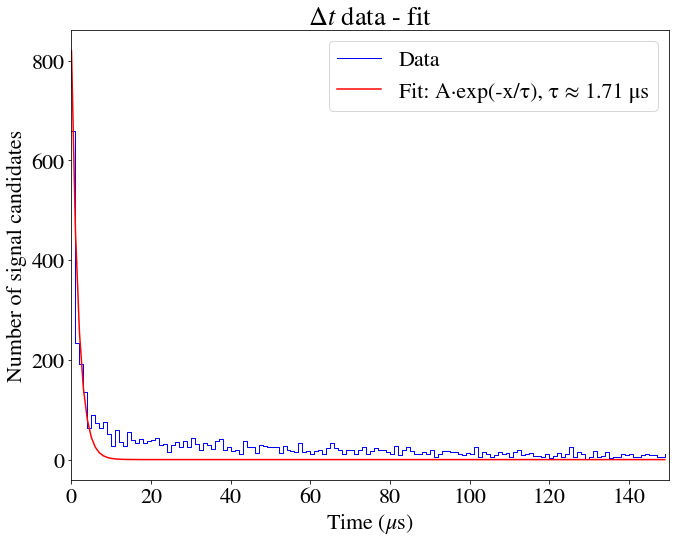

In [33]:
bin_centers = (bins_edges[:-1] + bins_edges[1:]) / 2  # calcular los centros de bin
data = hist_sig*N_events/N_events_sig

# 3. Definir la función exponencial para el ajuste
def exp_func(x, A, tau):
    return A * np.exp(-x / tau)

popt, pcov = curve_fit(exp_func, bin_centers, data, p0=(max(data), 500))

# popt contiene los parámetros A y tau
A_fit, tau_fit = popt
print(f"Ajuste: A = {A_fit:.2f}, tau = {tau_fit:.2f}")


# 5. (Opcional) Graficar el histograma y el ajuste
plt.figure()
plt.step(bins_edges[:-1], data, where='post', linewidth=1, label='Data', color='blue')
x_fit = np.arange(0, 150000, 1000)
plt.plot(x_fit, exp_func(x_fit, *popt), 'r-', label=f'Fit: A·exp(-x/τ), τ ≈ {tau_fit/1000:.2f} μs')
plt.xlabel(r'Time ($\mu$s)')
plt.ylabel('Number of signal candidates')
plt.title(r'$\Delta t$ data - fit')
plt.legend()
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
plt.xlim(0, 150000)
plt.savefig('/scratch/cgarcia_2002/Complete_analysis/Plots/DeltaT/DeltaT_FitData.png', facecolor='white')


Ajuste: A = 746.6437125810675, tau = 525.843470948224
Ajuste: A = 461.69922328311884, tau = 854.1379609358584


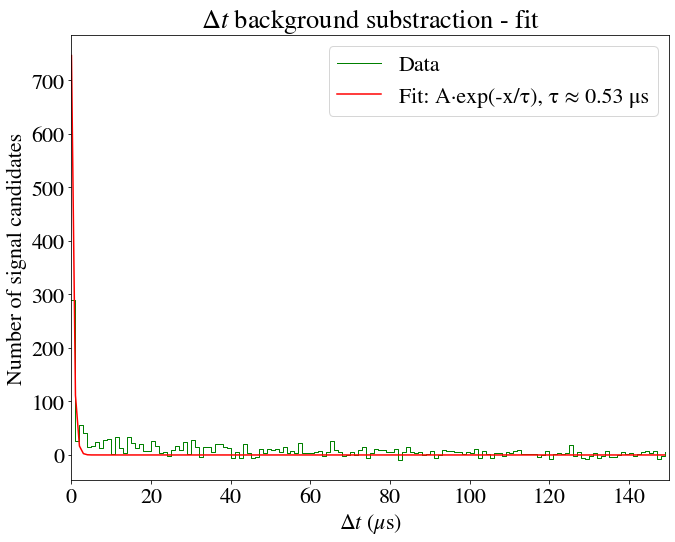

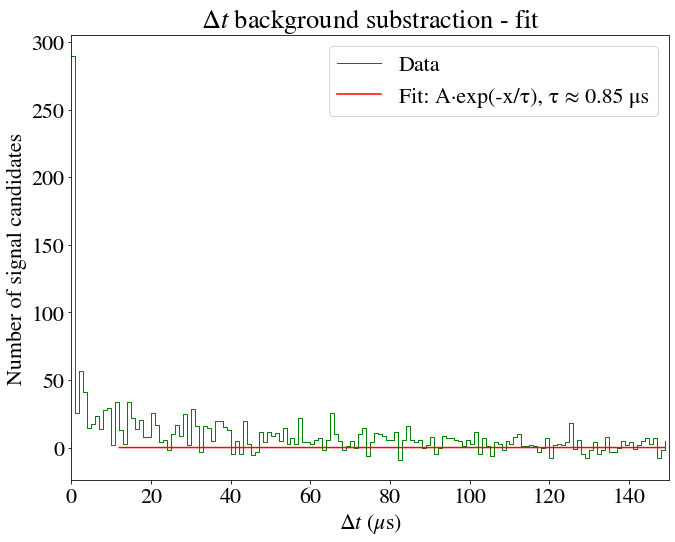

In [34]:
bin_centers = (bins_edges[:-1] + bins_edges[1:]) / 2  # calcular los centros de bin
data = hist_sig*N_events/N_events_sig - hist

popt, pcov = curve_fit(exp_func, bin_centers, data, p0=(max(data), 500))

# popt contiene los parámetros A y tau
A_fit, tau_fit = popt
print(f"Ajuste: A = {A_fit}, tau = {tau_fit}")

plt.figure()
plt.step(bins_edges[:-1], data, where='post', linewidth=1, label='Data', color='green')
x_fit = np.arange(0, 150000, 1000)
plt.plot(x_fit, exp_func(x_fit, *popt), 'r-', label=f'Fit: A·exp(-x/τ), τ ≈ {tau_fit/1000:.2f} μs')
plt.xlabel(r'$\Delta t$ ($\mu$s)')
plt.ylabel('Number of signal candidates')
plt.title(r'$\Delta t$ background substraction - fit')
plt.legend()
plt.tight_layout()
plt.xlim(0, 150000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
plt.savefig('/scratch/cgarcia_2002/Complete_analysis/Plots/DeltaT/DeltaT_FitBkgSubstraction.png', facecolor='white')

bin_centers_filtered = (bins_edges_filtered[:-1] + bins_edges_filtered[1:]) / 2  # calcular los centros de bin
data_filtered = hist_sig_filtered*N_events/N_events_sig - hist_filtered

popt, pcov = curve_fit(exp_func, bin_centers_filtered, data_filtered, p0=(max(data_filtered), 500))

# popt contiene los parámetros A y tau
A_fit, tau_fit = popt
print(f"Ajuste: A = {A_fit}, tau = {tau_fit}")

plt.figure()
plt.step(bins_edges[:-1], data, where='post', linewidth=1, label='Data', color='green')
x_fit = np.arange(12000, 150000, 1000)
plt.plot(x_fit, exp_func(x_fit, *popt), 'r-', label=f'Fit: A·exp(-x/τ), τ ≈ {tau_fit/1000:.2f} μs')
plt.xlabel(r'$\Delta t$ ($\mu$s)')
plt.ylabel('Number of signal candidates')
plt.title(r'$\Delta t$ background substraction - fit')
plt.legend()
plt.tight_layout()
plt.xlim(0, 150000)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
plt.savefig('/scratch/cgarcia_2002/Complete_analysis/Plots/DeltaT/DeltaT_FitBkgSubstraction.png', facecolor='white')
